In [26]:
# path = os.path.join('check1',f'{s_p[0]}_{s_p[1]}_{s_p[2]}.txt')
with open('yuan.txt','r') as f:
    c1 = f.read()
    c1 = c1.split(' ')
    c1 = c1[:-1]
set_gai1 = {}
for i in range(len(c1)):
    c1[i] = int(c1[i])
for i in c1:
    if i not in set_gai1:
        set_gai1[i] = 1
    else:
        set_gai1[i] = set_gai1[i] + 1
hengzuobiao = []
zhongzuobiao = []
for i in range(92):
    if i in set_gai1:
        hengzuobiao.append(i)
for j in hengzuobiao:
    zhongzuobiao.append(set_gai1[j])
# print(f'{s_p[0]}_{s_p[1]}_{s_p[2]}有',len(hengzuobiao),'种情况')
print(hengzuobiao)
print(zhongzuobiao)

[54, 56, 58, 60, 62]
[55, 12, 34, 1, 2]


<function matplotlib.pyplot.show(close=None, block=None)>

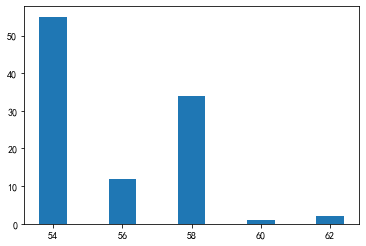

In [27]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['KaiTi']
plt.rcParams['axes.unicode_minus'] = False
plt.bar(hengzuobiao,zhongzuobiao)
plt.show

In [21]:
def genDDT(s):
#     print(s)
    sd = [[0 for i in range(16)] for i in range(16)]
    for i in range(16):#输入差分
        for j in range(16):
            sd[i][s[j]^s[j^i]] = sd[i][s[j]^s[j^i]]+1
    return sd

def getKS(s):
    sd = genDDT(s)
    KS=[]
    for i in range(len(sd)):
        temp = []
        for j in range((len(sd[i]))):
            if sd[i][j] !=0:
                temp.append(j)
        KS.append(temp)
    return KS

def getKSN(s):
    sd = genDDT(s)
    KSN = []
    for i in range(len(sd[0])):
        temp = []
        for j in range(len(sd)):
            if sd[j][i] != 0:
                temp.append(j)
        KSN.append(temp)
    return KSN

def KS_out(a,s):
    KS = getKS(s)
    count = []
    for i in range(len(a)):
        if a[i] == '-1':
            count.append(i)
    if len(count) == 4:
        return ['-1','-1','-1','-1']
    else:
        jishuqi = 0
        s_count = [0 for j in range(4)]
        for i in range(2**len(count)):
            b=a
            c = '{:04b}'.format(i)
            for j in range(len(count)):
                b[count[j]] = c[-j-1]
            b = int(''.join(b),2)
            
            for j in range(len(KS[b])):
                temp1 = '{:04b}'.format(KS[b][j])
                for z in range(4):
                    s_count[z] = s_count[z] + int(temp1[z])
                jishuqi = jishuqi +1
        for i in range(4):
            if s_count[i] == jishuqi :
                s_count[i] = '1'
            elif s_count[i] == 0:
                s_count[i] = '0'
            else:
                s_count[i] = '-1'
        return s_count
    
def KSN_out(a,s):
    KSN = getKSN(s)
    count = []
    for i in range(len(a)):
        if a[i] == '-1':
            count.append(i)
    if len(count) == 4:
        return ['-1','-1','-1','-1']
    else:
        jishuqi = 0
        s_count = [0 for j in range(4)]
        for i in range(2**len(count)):
            b=a
            c = '{:04b}'.format(i)
            
            for j in range(len(count)):
                b[count[j]] = c[-j-1]
            b = int(''.join(b),2)

            for j in range(len(KSN[b])):
                temp1 = '{:04b}'.format(KSN[b][j])
                for z in range(4):
                    s_count[z] = s_count[z] + int(temp1[z])
                jishuqi = jishuqi + 1
        for i in range(4):
            if s_count[i] == jishuqi:
                s_count[i] = '1'
            elif s_count[i] == 0:
                s_count[i] = '0'
            else:
                s_count[i] = '-1'
        return s_count
    
def P_model(a):
    p = [0, 8, 16, 24, 1, 9, 17, 25, 2, 10, 18, 26, 3, 11, 19, 27, 4, 12, 20, 28, 5, 13, 21, 29, 6, 14, 22, 30, 7, 15, 23, 31]
    b=[0 for i in range(32)]
    for i in p:
        b[p[i]] = a[i]
    return b

def PN_model(a):
    p = [0, 8, 16, 24, 1, 9, 17, 25, 2, 10, 18, 26, 3, 11, 19, 27, 4, 12, 20, 28, 5, 13, 21, 29, 6, 14, 22, 30, 7, 15, 23, 31]
    b=[]
    for i in p:
        b.append(a[i])
    return b

def KS_out_32(a,s):
    b=['0'for i in range(32)]
    for i in range(8):
        b[4*i:4*i+4] = KS_out(a[4*i:4*i+4],s[7-i])
    return b

def KSN_out_32(a,s):
    b=['0'for i in range(32)]
    for i in range(8):
        b[4*i:4*i+4] = KSN_out(a[4*i:4*i+4],s[7-i])
    print(b)
    return b

def cha_xor(a,b):
    if a == '-1' or b == '-1':
        return '-1'
    else:
        return str(int(a)^int(b))
    
def xor_32(a,b):
    c = []
    for i in range(32):
        c.append(cha_xor(a[i],b[i]))
    return c

def loop_7(a):
    temp = [0 for i in range(32)]
    for i in range(32):
        temp[i] = a[(i+7)%32]
    return temp

def loopN_7(a):
    temp = [0 for i in range(32)]
    for i in range(32):
        temp[i] = a[(i-7)%32]
    return temp

def xiangshang(a):
    s = [[3,8,0xf,1,0xa,6,5,0xb,0xe,0xd,4,2,7,0,9,0xc],
         [0xf,0xc,2,7,9,0,5,0xa,1,0xb,0xe,8,6,0xd,3,4],
         [8,6,7,9,3,0xc,0xa,0xf,0xd,1,0xe,4,0,0xb,5,2],
         [0,0xf,0xb,8,0xc,9,6,3,0xd,1,2,4,0xa,7,5,0xe],
         [1,0xf,8,3,0xc,0,0xb,6,2,5,4,0xa,9,0xe,7,0xd],
         [0xf,5,2,0xb,4,0xa,9,0xc,0,3,0xe,8,0xd,6,7,1],
         [7,2,0xc,5,8,4,6,0xb,0xe,9,1,0xf,0xd,3,0xa,0],
         [1,0xd,0xf,0,0xe,8,2,0xb,7,4,0xc,0xa,9,3,5,6]]
    temp = []
    temp1 = []
    left = a[0:32]
    right = a[32:64]
    temp.append(a)
    k = 0
    
    while k == 0 :
        temp1 = left
        left = KS_out_32(left,s)
#         print('s盒之后',left)
        left = P_model(left)
#         print('线性之后',left)
        left = xor_32(left,right)
        left = loopN_7(left)
#         left = loopN_7(xor_32(PN_model(KSN_out_32(left,s)),right))
        right = temp1
        temp.append(left+right)
        count = 0
        for i in left:
            if i == '-1':
                count = count+1
        if count == len(left):
            k = 1 
    return temp

def xiangxia(a):
    s = [[3,8,0xf,1,0xa,6,5,0xb,0xe,0xd,4,2,7,0,9,0xc],
         [0xf,0xc,2,7,9,0,5,0xa,1,0xb,0xe,8,6,0xd,3,4],
         [8,6,7,9,3,0xc,0xa,0xf,0xd,1,0xe,4,0,0xb,5,2],
         [0,0xf,0xb,8,0xc,9,6,3,0xd,1,2,4,0xa,7,5,0xe],
         [1,0xf,8,3,0xc,0,0xb,6,2,5,4,0xa,9,0xe,7,0xd],
         [0xf,5,2,0xb,4,0xa,9,0xc,0,3,0xe,8,0xd,6,7,1],
         [7,2,0xc,5,8,4,6,0xb,0xe,9,1,0xf,0xd,3,0xa,0],
         [1,0xd,0xf,0,0xe,8,2,0xb,7,4,0xc,0xa,9,3,5,6]]
    temp = []
    temp1 = []
    left = a[0:32]
    right = a[32:64]
    temp.append(a)
    k = 0
    
    while k == 0:
        temp1 = right
        right = KS_out_32(right,s)
        right = P_model(right)
        left = loop_7(left)
        right = xor_32(left,right)
#         right = xor_32(loop_7(left),P_model(KS_out_32(right,s)))
        left = temp1
        temp.append(left+right)
        count = 0
        for i in right:
            if i == '-1':
                count = count+1
        if count == len(right):
            k = 1
    return temp

def shuchu(a):
    b = []
    for i in range(len(a)):
        for j in range(len(a[i])):
            if a[i][j] == '-1':
                a[i][j] = '*'
#             if j%4 == 0:
#                 a[i][j] =' ' + a[i][j]
        b.append(''.join(a[i]))
    return b
    
def key_find_shang(shang):
    test = '{:064b}'.format(shang)
    test1 = []
    for i in range(len(test)):
        test1.append(test[i])
    a = xiangshang(test1)
    a = shuchu(a)
    return a

def key_find_xia(xia):
    test = '{:064b}'.format(xia)
    test1=[]
    for i in range(len(test)):
        test1.append(test[i])
    a = xiangxia(test1)
    a = shuchu(a)
    return a

##掐头去尾找密钥
def return_key_find_shang(shang):
    jishu = 0
    temp = key_find_shang(shang)
    key_bit = dict()
    for i in temp[1:]:
        key_bit[jishu] = []
        for j in range((len(i)//2)//4):
            if i[4*j+32:4*j+4+32] != '0000':
                key = []
                for k in range(4):
                    key.append(4*j+k)
                key_bit[jishu].append(key)
        jishu = jishu +1
    return key_bit
                
def return_key_find_xia(xia):
    jishu = 0
    temp = key_find_xia(xia)
    key_bit = dict()
    for i in temp[:-1]:
        key_bit[jishu] = []
        for j in range((len(i)//2)//4):
            if i[4*j+32:4*j+4+32] != '0000':
                key = []
                for k in range(4):
                    key.append(4*j+k)
                key_bit[jishu].append(key)
        jishu = jishu +1
    return key_bit

# temp1 = return_key_find_shang(2**31)
# temp2 = return_key_find_xia(8)
# # temp2 = return_key_find_xia(int('0001000000000000000000000000000000000000000000000000000000000000',2))
# for i in temp1:
#     print(i)
#     print(temp1[i])
# print()
# for i in temp2:
#     print(i)
#     print(temp2[i])
def s1(f,r,s_seat1,loop):
    p=[]
    for j in range(4):
        p.append(f'k_{r}_{((s_seat1-loop)+j)%80}')
    q=[]
    for j in range(4):
        q.append(f'k_{r+1}_{s_seat1+j}')
    pi = ','.join(p)
    pi = pi+' => '
    pi_r=''
    for j in range(4):
        pi_r = pi_r+pi+q[j]+'\n'
    
    qi = ','.join(q)
    qi = qi+' => '
    qi_r=''
    for j in range(4):
        qi_r = qi_r+qi+p[j]+'\n'
    f.write(pi_r+qi_r)

def s2(f,r,s_seat2,loop):
    p=[]
    for j in range(4):
        p.append(f'k_{r}_{((s_seat2-loop)+j)%80}')
    q=[]
    for j in range(4):
        q.append(f'k_{r+1}_{s_seat2+j}')
    pi = ','.join(p)
    pi = pi+' => '
    pi_r=''
    for j in range(4):
        pi_r = pi_r+pi+q[j]+'\n'
    
    qi = ','.join(q)
    qi = qi+' => '
    qi_r=''
    for j in range(4):
        qi_r = qi_r+qi+p[j]+'\n'
    f.write(pi_r+qi_r)

# def algebraic_relations(f,r,j):
#     p = []
#     q = []
#     for i in range(72):
#         p.append(f'k_{r}_{(i-j)%80}')
#         q.append(f'k_{r+1}_{i}')
#     for i in range(72):
#         temp = p[i]+' + '+q[i]+'\n'
#         f.write(temp)

def equal_relations(f,r,s_seat1,s_seat2,loop):
    p = []
    q = []
#     for i in range((76-s_seat2)%80,(76-s_seat1)%80):
    for i in range(s_seat2):
        p.append(f'k_{r}_{(i-loop)%80}')
        q.append(f'k_{r+1}_{i}')
    for i in range(s_seat2+4,s_seat1):
        p.append(f'k_{r}_{(i-loop)%80}')
        q.append(f'k_{r+1}_{i}')
    for i in range(s_seat1+4,80):
        p.append(f'k_{r}_{(i-loop)%80}')
        q.append(f'k_{r+1}_{i}')
    for i in range(len(p)):
        temp = p[i]+' , '+q[i]+'\n'
        f.write(temp)        

def generate_guanxi_keys_schedule(filepath,r,s_seat1,s_seat2,loop,shang,xia):
    with open(filepath,'w') as f :
        f.write(f'#ESF_kb {r} Rounds\n')
        f.write('connection relations\n')
        for i in range(r):
            s1(f,i,s_seat1,loop)
            s2(f,i,s_seat2,loop)
    #     f.write('algebraic relations\n')
    #     for i in range(14):
    #         algebraic_relations(f,i)
        f.write('equal relations\n')
        for i in range(r):
            equal_relations(f,i,s_seat1,s_seat2,loop)
        f.write('target\n')
        for i in range(len(shang)):
            for j in shang[len(shang)-i-1]:
                for k in j:
                    f.write(f'k_{i}_{80-k-1}\n')
        for i in xia:
            for j in xia[i]:
                for k in j:
                    f.write(f'k_{len(shang)+9+i}_{80-k-1}\n')
#         for i in range(0,4):
#             f.write(f'k_0_{80-i-1}\n')
#         for i in range(8,12):
#             f.write(f'k_0_{80-i-1}\n')
#         for i in range(16,20):
#             f.write(f'k_0_{80-i-1}\n')
#         for i in range(24,28):
#             f.write(f'k_0_{80-i-1}\n')
#         for i in range(4,8):
#             f.write(f'k_1_{80-i-1}\n')
#         for i in range(24,28):
#             f.write(f'k_12_{80-i-1}\n')
#         for i in range(4,8):
#             f.write(f'k_13_{80-i-1}\n')
#         for i in range(12,16):
#             f.write(f'k_13_{80-i-1}\n')
#         for i in range(20,24):
#             f.write(f'k_13_{80-i-1}\n')
#         for i in range(28,32):
#             f.write(f'k_13_{80-i-1}\n')
#         for i in range(32):
#             f.write(f'k_14_{80-i-1}\n')
        f.write('end\n')
import os
import re
import sys
import string
import random
from collections import namedtuple
from subprocess32 import call
from config import PATH_SAGE
from config import TEMP_DIR
import time
from datetime import datetime

def ordered_set(seq):
    """
    This function eliminates duplicated elements in a given list, 
    and keeping the order of appearance unchanged, 
    returns a list in which each elements appears only once
    """

    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

def get_equal_equation(path):
    
    contents = None
    try:
        if os.path.isfile(path):
            with open(path, 'r') as fileobj:
                contents = fileobj.read()
    except (TypeError, ValueError):
        pass
    
    contents = contents.strip()
    problem_name = find_problem_name(contents)
    sections = split_contents_by_sections(remove_comments(contents))
    
    equal_relations = sections.get('equal relations', '')
    equal_equations_file = os.path.join(TEMP_DIR, 'equal_equations.txt')
    if algebraic_relations != '':   
        with open(algebraic_equations_file, 'w') as equations_file:
            equations_file.write(algebraic_relations)
    print(equal_equations_file)

def get_algebraic_equation(path):

    contents = None
    try:
        if os.path.isfile(path):
            with open(path, 'r') as fileobj:
                contents = fileobj.read()
    except (TypeError, ValueError):
        pass
    
    contents = contents.strip()
    problem_name = find_problem_name(contents)
    sections = split_contents_by_sections(remove_comments(contents))
    
    algebraic_relations = sections.get('algebraic relations', '')
    algebraic_equations_file = os.path.join(TEMP_DIR, 'algebraic_equations.txt')
    if algebraic_relations != '':   
        with open(algebraic_equations_file, 'w') as equations_file:
            equations_file.write(algebraic_relations)
    print(algebraic_equations_file)


def read_relation_file(path, preprocess=1, D=2, log=0):
    """
    Reads a relation file in GD format and parses it into a systems of connection relations
    """

#     rnd_string_tmp = '%030x' % random.randrange(16**30)
    contents = None
    try:
        if os.path.isfile(path):
            with open(path, 'r') as fileobj:
                contents = fileobj.read()
    except (TypeError, ValueError):
        pass

    contents = contents.strip()
    problem_name = find_problem_name(contents)
    sections = split_contents_by_sections(remove_comments(contents))

    connection_relations = sections.get('connection relations', '')
    algebraic_relations = sections.get('algebraic relations', '')
    equal_relations = sections.get('equal relations','')
#     print('aaaaaa',equal_relations)
    variables = []
    if equal_relations != '':
        equal_relations,variables1 = parse_equal_relation(equal_relations)
#         with open ('equal.txt','w') as fealiejf:
#             for i in equal_relations:
#                 cwenben = ', '.join(i)+'\n'
#                 fealiejf.write(cwenben)
        variables.extend(variables1)
#     print('equal de bianliang:',variables1)
#     print()
    
#     print('rongru zong',variables)
#     algebraic_equations_file = os.path.join(TEMP_DIR, 'algebraic_equations_%s.txt' % rnd_string_tmp)
    if algebraic_relations != '' and preprocess == 1:   
#         with open(algebraic_equations_file, 'w') as equations_file:
#             equations_file.write(algebraic_relations)
#         starting_time = time.time()
#         print('Preprocessing phase was started - %s' % datetime.now())
        macaulay_basis_file = os.path.join(TEMP_DIR, 'macaulay_basis.txt')
#         sage_process = call(["-python3", os.path.join("core", "macaulay.py"), 
#                              "-i", algebraic_equations_file,
#                              "-o", macaulay_basis_file,
#                              "-t", "degrevlex",
#                              "-D", str(D)],shell = 'Ture')
#         print(sage_process)
#         elapsed_time = time.time() - starting_time
#         print('Preprocessing phase was finished after %0.4f seconds' % elapsed_time)
        try:
            with open(macaulay_basis_file, 'r') as groebner_basis_file:
                groebner_basis = groebner_basis_file.read()
                temp = groebner_basis_file.readlines()[0:-2]
        except IOError:
            print(macaulay_basis_file + ' is not accessible!')
            sys.exit()
        algebraic_relations += '\n' + groebner_basis
        # algebraic_relations = groebner_basis
        if connection_relations == '':
            connection_relations = algebraic_relations_to_connection_relations(algebraic_relations.split('\n'))
        else:
            connection_relations += '\n' + algebraic_relations_to_connection_relations(algebraic_relations.split('\n'))
    elif algebraic_relations != '' and preprocess == 0:
        if connection_relations == '':
            connection_relations = algebraic_relations_to_connection_relations(algebraic_relations.split('\n'))
        else:
            connection_relations += '\n' + algebraic_relations_to_connection_relations(algebraic_relations.split('\n'))
    symmetric_relations, implication_relations, variables2 = parse_connection_relations(connection_relations)
    variables.extend(variables2)
#     print(variables2)
#     print()
#     print(variables)
    variables = ordered_set(variables)
    known_variables = sections.get('known', [])
    if known_variables != []:
        known_variables = known_variables.split('\n')
    known_variables.extend([rel[0] for rel in symmetric_relations if len(rel) == 1])
    known_variables = ordered_set(known_variables)
    symmetric_relations = [rel for rel in symmetric_relations if len(rel) != 1]
    target_variables = sections.get('target', [])
    if target_variables != []:
        target_variables = target_variables.split('\n')
    else:
        target_variables = variables
    weights_section = sections.get('weights', [])
    target_weights = None
    if weights_section != []:
        target_weights = dict()
        weights_section = weights_section.split('\n')        
        for element in weights_section:
            var, weight = element.split(' ')
            target_weights[var] = int(weight)
    notguessed_variables = sections.get('not guessed', [])
    if notguessed_variables != []:
        notguessed_variables = notguessed_variables.split('\n')
    parsed_data = {'problem_name': problem_name,
                   'variables': variables,
                   'known_variables': known_variables,
                   'target_variables': target_variables,
                   'target_weights' : target_weights,
                   'notguessed_variables': notguessed_variables,
                   'symmetric_relations': symmetric_relations,
                   'implication_relations': implication_relations,
                   'equal_relations': equal_relations}
#     if log == 0 and preprocess == 1:
#         os.remove(algebraic_equations_file)
#         os.remove(macaulay_basis_file)
    return parsed_data


def find_problem_name(contents):
    """
    Find the name of the problem by reading the first comments if it exists.
    If no comments are found 'gdproblem' is used by default.
    """

    pattern = re.compile(r"(?<=#).*?\n", re.DOTALL)
    match = pattern.search(contents)
    if match:
        return match.group().strip()
    return 'gdproblem'


def split_contents_by_sections(contents):
    """
    Split a relation file into multiple sections
    It searches for the following keywords and split the contents by section
    'connection relations', 'algebraic relations', 'known', 'target', 'not guessed'
    Raises ValueError when the given contents is not in a valid GD format    
    """

    keywords = {
        'connection relations': ('connection relation', 'connection relations'),
        'algebraic relations': ('algebraic relation', 'algebraic relations'),
        'equal relations': ('equal relation', 'equal relations'),
        'known': ('known variables', 'known'),
        'target': ('target variables', 'target'),
        'not guessed': ('not guessed', ),
        'weights': ('weights', 'weight', ),
        'end': ('end', )
    }
    sections = []
    Section = namedtuple('Section', ('name', 'keyword_start', 'keyword_end'))

    for section_name, keywords in keywords.items():
        try:
            match, keyword_start, keyword_end = search_keywords(
                contents, keywords)
            sections.append(Section(section_name.lower(),
                                    keyword_start, keyword_end))
        except AttributeError:
            pass
    # sort by the start index of the section
    sections.sort(key=lambda x: x.keyword_start)

    if sections[-1].name != 'end':
        raise ValueError('File must end with an "end" keyword')

    parsed_sections = {}

    for i in range(len(sections) - 1):
        section = sections[i]
        next_section = sections[i + 1]
        parsed_sections[section.name] = contents[section.keyword_end:next_section.keyword_start].strip()

    return parsed_sections

def search_keywords(contents, keywords):
    """
    Search multiple keywords in a given contents case insensitively, and return the first match
    Raises ValueError when none of the keywords is found in the contents
    """

    sense_pattern = re.compile(
        '|'.join(rf'\b{re.escape(keyword)}\b' for keyword in keywords), re.IGNORECASE)
    match = sense_pattern.search(contents)
    return match.group(), match.start(), match.end()

def remove_comments(contents):
    """
    Remove the comments from the contents
    """
    
    contents = re.sub(re.compile(r"#.*?\n", re.DOTALL), "",
                      contents)  # remove all occurrences of #COMMENT from line
    return contents

def parse_equal_relation(equal_relations):
    dengjia_relations = []
    variables = []
    equal_relations = equal_relations.replace(' ','')
    equal_relations = equal_relations.split('\n')
    for i in range(len(equal_relations)):
        equal_relations[i] = equal_relations[i].split(',')
    
    remaining_elements = set()
    for lst in equal_relations:
        intersection = set(lst) & remaining_elements
        if intersection:
            for cl in dengjia_relations:
                if intersection & set(cl):
                    cl.extend(lst)
                    remaining_elements |= set(lst)
                    break
        else:
            dengjia_relations.append(lst)
            remaining_elements |= set(lst)
            
    for i in range(len(dengjia_relations)):
        dengjia_relations[i] = list(ordered_set(dengjia_relations[i]))
        variables.extend(dengjia_relations[i])
    variables = ordered_set(variables)
    return dengjia_relations,variables

def parse_connection_relations(connection_relations):
    variables = []
    symmetric_relations = []
    implication_relations = []
    connection_relations = connection_relations.replace(' ', '')
    connection_relations = connection_relations.split('\n')
    for rel in connection_relations:
        # Extract implication relations
        if '=>' in rel:
            rel = re.split(',|=>', rel)
            implication_relations.append(rel)
        # Extract symmetric relations
        else:
            rel = rel.split(',')
            symmetric_relations.append(rel)
        variables.extend(rel)
    variables = ordered_set(variables)
    return symmetric_relations, implication_relations, variables


def random_prefix_generator(N):
    """
    Generate a random string of length N
    """

    return ''.join(random.choice(string.ascii_uppercase) for _ in range(N))

def get_variables_from_monomial(monomial):
    """
    It is fed by a non-constant monomial like x*y*z and 
    returns a list consisting of given monomial's
    variables. which in this case are: ['x', 'y', 'z']
    """
    assert(not monomial.isdigit())
    temp = monomial.split('*')
    temp.sort()
    return temp

def get_variables_from_list_of_monomials(list_of_monomials):
    """
    It is fed by a list of monomials and returns the variables 
    which are used in the given monomials
    """
    vars = set()
    for monomial in list_of_monomials:
        vars = vars.union(get_variables_from_monomial(monomial))
    temp = list(vars)
    temp.sort()
    return temp

def get_monomials_from_polynomial(polynomial):
    """
    It is fed by a polynomial, and returns its monomials
    """

    monomials = polynomial.split('+')
    if '1' in monomials:
        monomials.remove('1')
    if '0' in monomials:
        monomials.remove('0')
    return list(set(monomials))

def get_monomials_from_list_of_polys(polys):
    """
    It is fed by a list of polynomials and returns
    all of the monomials which are used in the given 
    polynomials
    """

    monomials = set()
    for poly in polys:
        monos = set(get_monomials_from_polynomial(poly))
        monomials = monomials.union(monos)
    return list(monomials)

def degree_of_monomial(monomial):
    """
    Returns the degree of the given monomial
    """

    vars = get_variables_from_monomial(monomial)
    return len(vars)

def algebraic_relations_to_connection_relations(algebraic_relations):
    """
    Generate the connection relations derived from the given algebraic relations by introducing new variables
    It currently work for boolean polynomial relations merely
    """

    connection_relations = []
    if algebraic_relations[-1] == '':
        algebraic_relations[-1:] = []
    algebraic_relations = [poly.replace(' ', '') for poly in algebraic_relations]
    all_monomials = get_monomials_from_list_of_polys(algebraic_relations)
    algebraic_variables = get_variables_from_list_of_monomials(all_monomials)
    dummy_vars_prefix = random_prefix_generator(4)
    substitution_dictionary = dict()
    for monomial in all_monomials:
        if degree_of_monomial(monomial) >= 2:
            monomial_variables = get_variables_from_monomial(monomial)
            var_indices = [algebraic_variables.index(
                x) for x in monomial_variables]
            var_indices = list(map(str, var_indices))
            dummy_var = "{0}{1}".format(
                dummy_vars_prefix, "".join(var_indices))
            if dummy_var not in substitution_dictionary.values():
                connection_relations.append("{0}=>{1}".format(
                    ",".join(monomial_variables), dummy_var))
            substitution_dictionary[monomial] = dummy_var

    for poly in algebraic_relations:
        linearized_relation = [substitution_dictionary.get(term, term) for term in poly.split("+")]
        if '1' in linearized_relation:
            linearized_relation.remove('1')
        if '0' in linearized_relation:
            linearized_relation.remove('0')
        connection_relations.append(",".join(linearized_relation))
    return "\n".join(connection_relations)
# from core.parsesolution import parse_solver_solution
from gurobipy import *
# from core.inputparser import read_relation_file
import os
import time
import random
from core.parsesolution import parse_solver_solution
from core.graphdrawer import draw_graph
# from config import TEMP_DIR

class ReduceGDtoMILP:
    """
    ReduceGDtoMILP-version4-kb
    This class reduces the guess-and-determine attack and 
    key-bridging to an MILP problem, and then solves it via Gurobi
    Created by Hosein Hadipour
    version4-kb
    July 13, 2020
    mod 0: Maximization
    mod 1: Minimization
    max_guess:  The number of guessed variables in mod 0,
                and an upper bound for the number of guessed variables in mod 1
    max_steps:  Number of state copies 
    """

    count = 0

    def __init__(self, inputfile_name='', outputfile_name='output', max_guess=0, max_steps=0, direction='min',\
        tikz=0, preprocess=1, D=2, dglayout="dot", log=0):
        self.inputfile_name = inputfile_name
        self.rnd_string_tmp = '%030x' % random.randrange(16**30)        
        self.output_dir = outputfile_name
        self.max_guess = max_guess
        self.max_steps = max_steps
        self.direction = direction
        self.dglayout = dglayout
        self.log = log
        ###############################
        # Read and parse the input file
        parsed_data = read_relation_file(self.inputfile_name, preprocess, D)
        self.problem_name = parsed_data['problem_name']
        self.variables = parsed_data['variables']
        self.known_variables = parsed_data['known_variables']
        self.target_variables = parsed_data['target_variables']
        self.target_weights = parsed_data['target_weights']
        self.notguessed_variables = parsed_data['notguessed_variables']
        self.symmetric_relations = parsed_data['symmetric_relations']
        self.implication_relations = parsed_data['implication_relations']
        self.equal_relations = parsed_data['equal_relations']
        self.num_of_relations = len(
            self.symmetric_relations) + len(self.implication_relations) + len(self.equal_relations)
        self.num_of_vars = len(self.variables)
        ###############################
        if self.max_guess is None:
            self.max_guess = len(self.target_variables)
            print('The number of guessed variables is set to be at most %d' % self.max_guess)
        self.lpfile_name = 'gai_milp_mg%d_ms%d_%s_%s.lp' % (
                            self.max_guess,\
                            max_steps, direction, self.rnd_string_tmp)
        self.deductions = self.generate_possible_deductions()
        self.equal_deductions = self.generate_possible_equal_deductions()
        # milp_variables is initialized to the variables corresponding to the initial state variables
        self.milp_variables = ['%s_0' % v for v in self.variables]
        self.time_limit = -1
        self.tikz = tikz

    def ordered_set(self, seq):
        """
        This method eliminates duplicated elements in a given list, 
        and returns a list in which each elements appears only once
        """

        seen = set()
        seen_add = seen.add
        return [x for x in seq if not (x in seen or seen_add(x))]

    def generate_possible_equal_deductions(self):
        possible_deductions = {}
        for v in self.variables:
            possible_deductions[v] = []
            for rel in self.equal_relations:
                if v in rel:
                    temp = rel.copy()
                    temp.remove(v)
                    possible_deductions[v].append(temp)
        return possible_deductions
    
    def generate_possible_deductions(self):
        """
        This method generates all possible deductions 
        Core idea of information propagation: 
            If there is a relation in which all terms are known except one, 
            then the value of the last term can be determined as well. 
        """

        possible_deductions = {}
        for v in self.variables:
            possible_deductions[v] = [[v]]
            for rel in self.symmetric_relations:
                if v in rel:
                    temp = rel.copy()
                    temp.remove(v)
                    possible_deductions[v].append(temp)
            for rel in self.implication_relations:
                if v == rel[-1]:
                    temp = rel.copy()
                    temp.remove(v)
                    possible_deductions[v].append(temp)
#             for rel in self.equal_relations:
#                 if v in rel:
#                     temp = rel.copy()
#                     temp.remove(v)
#                     possible_deductions[v].append(temp)
        return possible_deductions

    def generate_objective_function(self):
        """
        This method generates the objective function of the MILP problem
        """

        if self.direction == 'max':
            objective_function = 'Maximize\n'
            final_state = ['%s_%d' % (v, self.max_steps)
                           for v in self.target_variables]
            objective_function += ' + '.join(final_state)
        elif self.direction == 'min':
            objective_function = 'Minimize\n'
            unknown_init_state_vars = [v for v in self.variables if v not in self.known_variables]
            if self.target_weights != None:
                print("target_weights != None")
                wights = [self.target_weights.get(v, 1) for v in unknown_init_state_vars]
                weighted_init_state = zip(wights, unknown_init_state_vars)
                objective_list = ['%d %s_%d' % (w, v, 0) for (w, v) in weighted_init_state]                
            else:
                objective_list = ['%s_%d' % (v, 0) for v in self.target_variables]
            objective_function += ' + '.join(objective_list)
        objective_function += '\n'
        return objective_function
    
#     def generate_initial_conditions(self):
#         """
#         This method generates the initial constraints consisting of 
#         constrains corresponding to the maximum number of guessed variables, and 
#         number of known variables in the initial state
#         """

#         initial_constraints = 'Subject To\n'

#         unknown_vars = ['%s' % v for v in self.variables if v not in self.known_variables]
#         unknown_init_state_vars = ['%s_0' % v for v in unknown_vars]
#         if self.target_weights != None:
#             LHS1 = ['%d %s_0' % (self.target_weights[v], v) for v in unknown_vars]
#             LHS1 = ' + '.join(LHS1)
#         else:
#             LHS1 = ' + '.join(unknown_init_state_vars)
#         RHS1 = self.max_guess
#         final_state_target_vars = ['%s_%d' % (
#             v, self.max_steps) for v in self.target_variables]
#         LHS2 = ' + '.join(final_state_target_vars)
#         RHS2 = len(final_state_target_vars)

#         if self.direction == 'max':
#             # initial_constraints += '%s = %d\n' % (LHS1, RHS1)
#             initial_constraints += '%s <= %d\n' % (LHS1, RHS1)
#         elif self.direction == 'min':
#             initial_constraints += '%s <= %d\n' % (LHS1, RHS1)
#             initial_constraints += '%s = %d\n' % (LHS2, RHS2)          

#         for v in self.known_variables:
#             if v != '':
#                 initial_constraints += '%s_0 = 1\n' % v

#         # Limit the notguessed variables to be equal to 0 in the first step of knowledge propagation
#         for v in self.notguessed_variables:
#             if v != '':                
#                 initial_constraints += '%s_0 = 0;\n' % v        
#         return initial_constraints

    def generate_initial_conditions(self):
        """
        This method generates the initial constraints consisting of 
        constrains corresponding to the maximum number of guessed variables, and 
        number of known variables in the initial state
        """

        initial_constraints = 'Subject To\n'

        unknown_vars = ['%s' % v for v in self.variables if v not in self.known_variables]
        unknown_init_state_vars = ['%s_0' % v for v in unknown_vars]
        first_state_target_vars = ['%s_0' % v for v in self.target_variables]
        not_target_vars = ['%s_0' % v for v in self.variables if v not in self.target_variables]
        if self.target_weights != None:
            LHS1 = ['%d %s_0' % (self.target_weights[v], v) for v in unknown_vars]
            LHS1 = ' + '.join(LHS1)
        else:
            LHS1 = ' + '.join(first_state_target_vars)
        RHS1 = self.max_guess
        final_state_target_vars = ['%s_%d' % (
            v, self.max_steps) for v in self.target_variables]
        LHS2 = ' + '.join(final_state_target_vars)
        RHS2 = len(final_state_target_vars)
        
        LHS3 = ' + '.join(not_target_vars)
        RHS3 = 0

        if self.direction == 'max':
            # initial_constraints += '%s = %d\n' % (LHS1, RHS1)
            initial_constraints += '%s <= %d\n' % (LHS1, RHS1)
        elif self.direction == 'min':
            initial_constraints += '%s <= %d\n' % (LHS1, RHS1)
            initial_constraints += '%s = %d\n' % (LHS2, RHS2)          
            initial_constraints += '%s = %d\n' % (LHS3, RHS3)

        for v in self.known_variables:
            if v != '':
                initial_constraints += '%s_0 = 1\n' % v

        # Limit the notguessed variables to be equal to 0 in the first step of knowledge propagation
        for v in self.notguessed_variables:
            if v != '':                
                initial_constraints += '%s_0 = 0;\n' % v        
        return initial_constraints


    def generate_milp_constraints(self):
        """
        This method generates the milp constraints corresponding to the 
        obtained deductions.
        """

        milp_constraints = ''
        for step in range(self.max_steps):
            for v in self.variables:
                v_old = '%s_%d' % (v, step)
                v_new = '%s_%d' % (v, step + 1)
                tau1 = len(self.deductions[v])
                tau2 = len(self.equal_deductions[v])
                tau = tau1 + tau2
                v_path_variables = ['%s_%d_%d' %
                                    (v, step + 1, i) for i in range(tau)]
                self.milp_variables.extend([v_new] + v_path_variables)
                #####################################-State variable constraints-#####################################
                ######################################################################################################
                ######################################################################################################
                LHS = ' + '.join(v_path_variables)
                milp_constraints += '\ Constraints corresponding to the state variable %s:\n' % v_new
                if tau == 1:
                    milp_constraints += '%s - %s = 0\n' % (v_new, LHS)
                else:
                    milp_constraints += '-2 %s + %s >= -1\n' % (v_new, LHS)
                    milp_constraints += '%d %s - %s >= 0\n' % (
                        tau, v_new, LHS.replace('+', '-'))
                #####################################-Path variable constraints-######################################
                ######################################################################################################
                ######################################################################################################
                for i in range(tau1):
                    v_connected_variables = ['%s_%d' % (
                        var, step) for var in self.deductions[v][i]]
                    LHS = ' - '.join(v_connected_variables)
                    kapa = len(v_connected_variables)
                    milp_constraints += '\ Constraints corresponding to the path variable %s:\n' % v_path_variables[i]
                    if kapa == 1:
                        milp_constraints += '%s - %s = 0\n' % (
                            v_path_variables[i], LHS)
                    else:
                        milp_constraints += '%s - %s >= %d\n' % (
                            v_path_variables[i], LHS, 1 - kapa)
                        milp_constraints += '-%d %s + %s >= 0\n' % (
                            kapa, v_path_variables[i], LHS.replace('-', '+'))
                #####################################-Path variable constraints-######################################
                ######################################################################################################
                ######################################################################################################
#                 for i in range(tau // 2, tau):
#                     v_connected_variables = ['%s_%d' % (
#                         var, step) for var in self.deductions[v][i]]
#                     LHS = ' - '.join(v_connected_variables)
#                     kapa = len(v_connected_variables)
#                     milp_constraints += '\ Constraints corresponding to AAAA the path variable %s:\n' % v_path_variables[i]
#                     if kapa == 1:
#                         milp_constraints += '%s - %s = 0\n' % (
#                             v_path_variables[i], LHS)
#                     else:
#                         milp_constraints += '%s - %s >= %d\n' % (
#                             v_path_variables[i], LHS, 1 - kapa)
#                         milp_constraints += '-%d %s + %s >= 0\n' % (
#                             kapa, v_path_variables[i], LHS.replace('-', '+'))
                ##################################-equal Path variable constraints-###################################
                ######################################################################################################
                ######################################################################################################
                for i in range(tau1, tau):
                    v_equal_variables = ['%s_%d' % (
                        var, step) for var in self.equal_deductions[v][i - tau1]]
                    LHS = ' + '.join(v_equal_variables)
                    kapa = len(v_equal_variables)
                    milp_constraints += '\ Constraints corresponding to the equal path variable %s:\n' % v_path_variables[i]
                    if kapa == 1:
                        milp_constraints += '%s - %s = 0\n' % (
                            v_path_variables[i], LHS)
                    else:
                        milp_constraints += '-2 %s + %s >= -1\n' % (
                            v_path_variables[i], LHS)
                        milp_constraints += '%d %s - %s >= 0\n' % (
                            kapa, v_path_variables[i], LHS.replace('+', '-'))
                ######################################################################################################
                ######################################################################################################
                ######################################################################################################
                # Given that the order of putting constraints into an LP file have a great impact on the performance of
                # Gurobi (and other CP solvers), user may want to change the order of constraints inside the generated
                # LP file in order to find a more suitable ordering. It is not known which odering might be the best from
                # the theoretical point of view in general. However, according to my experiences it may be better to put the connected
                # relations closer to each other. For example, change the order of the above blocks to see what impact it has
                # on the performance.
        return milp_constraints

    def declare_binary_variables(self):
        """
        This function declares the binary variables into the generated LP file
        """

        constraints = 'Binary\n'
        for v in self.milp_variables:
            constraints += '%s\n' % v
        return constraints

    def make_model(self):
        """
        This method makes the MILP model, and then write it into an LP file
        """

        print('Generating the MILP model ...')
        start_time = time.time()
        lp_str = self.generate_objective_function()
        lp_str += self.generate_initial_conditions()
        lp_str += self.generate_milp_constraints()
        lp_str += self.declare_binary_variables()
        lp_str += 'End\n'
        lp_file_path = os.path.join('lp', self.lpfile_name)
        elapsed_time = time.time() - start_time
        with open(lp_file_path, 'w') as lpfile:
                lpfile.write(lp_str) 
        if self.log == 1:
            print('MILP model was generated, and written into %s after %0.2f seconds' % (
                lp_file_path, elapsed_time))
        else:
            print('MILP model was generated after %0.2f seconds' % elapsed_time)

    def parse_and_write_solution(self):
        """
        This method parses the obtained soltuion (If MILP model is feasible), 
        and derives the determination flow such that user can simply find
        how the target variables are determined
        """
        
        self.vertices = []
        self.edges = []
        
        separator_line = ''.join(['#']*60)
        output_buffer = ''
        output_buffer += 'Number of Relations: %d\n' % self.num_of_relations
        output_buffer += 'Number of variables: %d\n' % self.num_of_vars
        output_buffer += 'Number of target variables: %d\n' % len(
            self.target_variables)
        output_buffer += 'Number of known variables: %d\n' % len(
            self.known_variables)
        output_buffer += 'Number of guessed variables: %d\n' % len(
            self.guessed_vars)
        output_buffer += 'Number of state copies (max_steps): %d\n' % self.max_steps
        output_buffer += 'An upper bound for the number of guessed variables given by user (max_guess): %d\n' % self.max_guess
        output_buffer += '%d out of %d state variables are known after %d state copies\n' % (
            self.final_info, self.num_of_vars, self.max_steps)
        output_buffer += separator_line
        output_buffer += '\nThe following %d variable(s) are guessed:\n%s\n' % (
            len(self.guessed_vars), ', '.join(self.guessed_vars))
        output_buffer += separator_line
        output_buffer += '\nThe following %d variable(s) are initially known:\n%s\n' % (
            len(self.known_variables), ', '.join(self.known_variables))
        output_buffer += separator_line
        output_buffer += '\nTarget variables:\n%s\n' % ', '.join(
            self.target_variables)

        output_buffer += separator_line
        output_buffer += '\nDetermination flow:\n'
        step = 0
        determined_target_variables = dict(
            zip(self.target_variables, [0]*(len(self.target_variables))))
        for v in self.known_variables + self.guessed_vars:
            determined_target_variables[v] = 1
        while step < self.max_steps + 1 and not(all(determined_target_variables.values())):
            sub_title = '\nState %d:\n' % step
            output_buffer += sub_title
            for rel in self.symmetric_relations:
                rel_known_vars = [
                    v for v in rel if self.solutions[step]['%s_%d' % (v, step)] == 1]
                rel_str = ', '.join(rel)
                if len(rel_known_vars) == (len(rel) - 1):
                    determined_var = list(set(rel) - set(rel_known_vars))
                    lhs = ', '.join(rel_known_vars)
                    rhs = ', '.join(determined_var)
                    self.vertices.append(rhs)
                    for vr in rel_known_vars:
                        self.vertices.append(vr)
                        self.edges.append((vr, rhs))
                    if determined_var[0] in self.target_variables:
                        determined_target_variables[determined_var[0]] = 1
                    output = '%s in symmetric relation [%s] are known: %s ===> %s' % (
                        lhs, rel_str, lhs, rhs) + '\n'
                    output_buffer += output
            
            for rel in self.equal_relations:
                rel_known_vars = [
                    v for v in rel if self.solutions[step]['%s_%d' % (v, step)] == 1]
                rel_str = ', '.join(rel)
                if len(rel_known_vars) >=1 :
                    determined_var = list(set(rel) - set(rel_known_vars))
                    lhs = ', '.join(rel_known_vars)
                    rhs = ', '.join(determined_var)
                    self.vertices.append(rhs)
                    for vr in rel_known_vars:
                        self.vertices.append(vr)
                        self.edges.append((vr, rhs))
                    if determined_var[0] in self.target_variables:
                        determined_target_variables[determined_var[0]] = 1
                    output = '%s in equal relation [%s] are known: %s ===> %s' % (
                        lhs, rel_str, lhs, rhs) + '\n'
                    output_buffer += output
            
            for rel in self.implication_relations:
                rel_known_vars = [
                    v for v in rel if self.solutions[step]['%s_%d' % (v, step)] == 1]
                rel_str = ', '.join(rel)
                if rel_known_vars == rel[0:-1]:
                    determined_var = [rel[-1]]
                    lhs = ', '.join(rel_known_vars)
                    rhs = ', '.join(determined_var)
                    self.vertices.append(rhs)
                    for vr in rel_known_vars:
                        self.vertices.append(vr)
                        self.edges.append((vr, rhs))
                    if determined_var[0] in self.target_variables:
                        determined_target_variables[determined_var[0]] = 1
                    output = '%s in implication relation [%s] are known: %s ===> %s' % (
                        lhs, rel_str, lhs, rhs) + '\n'
                    output_buffer += output
            output_buffer += separator_line
            step += 1
        self.finally_known = [v for v in self.variables if self.solutions[self.max_steps]['%s_%d' % (v, self.max_steps)] == 1]
        output_buffer += '\nThe following variables are known in final state:\n%s' % ', '.join(self.finally_known)
        with open(self.output_dir, 'w') as outputfile_obj:
            outputfile_obj.write(output_buffer)

    def solve_model(self):
        """
        This method uses Gurobi to solve the obtained MILP problem
        """
        lpfile_path = os.path.join('lp', self.lpfile_name)
        self.milp_model = read(lpfile_path)
        if self.log == 0:
            os.remove(lpfile_path)
        if self.time_limit != -1:
            self.milp_model.params.TimeLimit = self.time_limit
        # 0 (default: Gurobi strikes a balance between finding feasible solution and proving the optimality)
        self.milp_model.params.MIPFocus = 0
        # 1 (quickly find a feasible solution)
        # 2 (proving optimality is in priority)
        # 3 (focus on the best bound)
        self.milp_model.params.Threads = 0  # 0 (default value)
        self.milp_model.params.OutputFlag = 1  # 1 (default value)

        start_time = time.time()
        ##########################
        ##########################
        self.milp_model.optimize()
        ##########################
        ##########################
        elapsed_time = time.time() - start_time
        print('Solving process was finished after %0.2f seconds' % elapsed_time)

        if self.milp_model.Status == GRB.OPTIMAL or self.milp_model.Status == GRB.INTERRUPTED or self.milp_model.Status == GRB.TIME_LIMIT:
            if self.milp_model.SolCount == 0:
                print(
                    'No solution found! Perhaps, I need more time to solve this problem.')
                return
            self.objval = self.milp_model.objval
            self.solutions = [0]*(self.max_steps + 1)
            for step in range(self.max_steps + 1):
                state_vars = ['%s_%d' % (v, step) for v in self.variables]
                state_values = list(
                    map(lambda x: int(self.milp_model.getVarByName(x).Xn), state_vars))
                self.solutions[step] = dict(zip(state_vars, state_values))
            if self.milp_model.SolCount == 0:
                print('Sorry! There is no solution to be parsed.\nTry again please.')
                return
            else:
                if self.log == 1:
                    gurobi_solution_file_name = 'grbsol_mg%d_ms%d_%s.sol' % (
                        self.max_guess, self.max_steps, self.direction)
                    grb_solution_file_path = os.path.join(
                        TEMP_DIR, gurobi_solution_file_name)
                    self.milp_model.write(grb_solution_file_path)                    
                parse_solver_solution(self)
                draw_graph(self.vertices, self.edges, self.known_variables, self.guessed_vars,\
                    self.output_dir, self.tikz, self.dglayout)
        elif self.milp_model.Status == GRB.INFEASIBLE:
            print('The obtained milp model is infeasible')
        else:
            print('Unknown error!')
        print('--------------------------------------------------------------')
        return len(self.guessed_vars)

In [22]:
path = 'imp_chanfen_FSE_9R_my.txt'
data = []
with open(path , 'r') as f:
    for line in f.readlines():
        if line != '\n':
            data.append(line[0:64])

In [23]:
print(data[2*1888][::-1])
print(data[2*1888+1][::-1])
print()
a = key_find_shang(int(data[2*1888][::-1],2))
b = key_find_xia(int(data[2*1888+1][::-1],2))
for u in a:
    print(u)
print()
for v in b:
    print(v)

temp1 = return_key_find_shang(int(data[2*1888][::-1],2))
temp2 = return_key_find_xia(int(data[2*1888+1][::-1],2))
#     temp1 = key_var[2*i]
#     temp2 = key_var[2*i+1]
r = 9 + len(temp1) + len(temp2) - 1
for v in temp1:
    print(temp1[v])

for v in temp2:
    print(temp2[v])

0100000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000101000000000

0100000000000000000000000000000000000000000000000000000000000000
0000000*0000000*0000000*0000000*01000000000000000000000000000000
*0*0*0*0*0*0*0*0*0*0*0*0*0*0*0*00000000*0000000*0000000*0000000*
*********************************0*0*0*0*0*0*0*0*0*0*0*0*0*0*0*0

0000000000000000000000000000000000000000000000000000101000000000
0000000000000000000010100000000000000*0000000*0000000*0000000000
00000*0000000*0000000*00000000000*0*0*000*0*0*010*0*0*000*0*0*00
0*0*0*000*0*0*010*0*0*000*0*0*00********************************
[[0, 1, 2, 3]]
[[4, 5, 6, 7], [12, 13, 14, 15], [20, 21, 22, 23], [28, 29, 30, 31]]
[[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11], [12, 13, 14, 15], [16, 17, 18, 19], [20, 21, 22, 23], [24, 25, 26, 27], [28, 29, 30, 31]]
[[20, 21, 22, 23]]
[[4, 5, 6, 7], [12, 13, 14, 15], [20, 21, 22, 23]]
[[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11], [12, 13, 14, 1

In [32]:
path1 = '1888_ESF_15.txt'
shang = int(data[2*1888][::-1],2)
xia = int(data[2*1888+1][::-1],2)
temp1 = return_key_find_shang(shang)
temp2 = return_key_find_xia(xia)
#     temp1 = key_var[2*i]
#     temp2 = key_var[2*i+1]
r = 9 + len(temp1) + len(temp2) - 1
print(r)
generate_guanxi_keys_schedule(path1,r,76,72,13,temp1,temp2)
gdmilp = ReduceGDtoMILP(inputfile_name = path1,
                        outputfile_name = '54_15_ESFoutput',
                        max_guess=100,
                        max_steps=6,
                        direction='min',
                        dglayout = 'dot')
gdmilp.make_model()
min_guess_num = gdmilp.solve_model()

14
Generating the MILP model ...
MILP model was generated after 0.70 seconds
Read LP format model from file lp\gai_milp_mg100_ms6_min_3bda0da48bae466a4dafbea772ad82.lp
Reading time = 0.11 seconds
: 38307 rows, 24048 columns, 200020 nonzeros
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads
Optimize a model with 38307 rows, 24048 columns and 200020 nonzeros
Model fingerprint: 0xc1f3a363
Variable types: 0 continuous, 24048 integer (24048 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Presolve removed 38245 rows and 24014 columns
Presolve time: 0.25s
Presolved: 62 rows, 34 columns, 167 nonzeros
Variable types: 0 continuous, 34 integer (34 binary)
Found heuristic solution: objective 56.0000000

Root relaxation: objective 5.400000e+01, 21 iterations, 0.00 seconds (0.00 work units)

    Nod

In [5]:
k = 'k_0_67, k_0_68, k_0_69, k_0_70, k_0_71, k_0_72, k_0_73, k_0_74, k_0_75, k_0_76, k_0_77, k_0_78, k_0_79, k_14_52, k_14_53, k_14_54, k_14_65, k_1_57, k_1_58, k_0_58, k_14_68, k_14_69, k_14_55, k_14_56, k_14_70, k_14_71, k_14_57, k_14_58, k_14_59, k_14_60, k_14_61, k_14_62, k_14_63, k_14_64, k_14_48, k_14_49, k_14_50, k_14_51, k_0_63, k_0_64, k_0_65, k_0_66, k_0_59, k_0_60, k_0_61, k_0_62, k_14_76, k_14_77, k_14_78, k_14_79, k_14_72, k_14_73, k_14_74, k_14_75'
k = k.split(', ')
for i in k:
    print(i)

k_0_67
k_0_68
k_0_69
k_0_70
k_0_71
k_0_72
k_0_73
k_0_74
k_0_75
k_0_76
k_0_77
k_0_78
k_0_79
k_14_52
k_14_53
k_14_54
k_14_65
k_1_57
k_1_58
k_0_58
k_14_68
k_14_69
k_14_55
k_14_56
k_14_70
k_14_71
k_14_57
k_14_58
k_14_59
k_14_60
k_14_61
k_14_62
k_14_63
k_14_64
k_14_48
k_14_49
k_14_50
k_14_51
k_0_63
k_0_64
k_0_65
k_0_66
k_0_59
k_0_60
k_0_61
k_0_62
k_14_76
k_14_77
k_14_78
k_14_79
k_14_72
k_14_73
k_14_74
k_14_75


In [23]:
# k_0_58,k_0_59, k_0_60, k_0_61, k_0_62,k_0_63, k_0_64, k_0_65, k_0_66,k_0_67, k_0_68, k_0_69, k_0_70, k_0_71, k_0_72, k_0_73, k_0_74, k_0_75, k_0_76, k_0_77, k_0_78, k_0_79
# k_1_57, k_1_58, 
# k_14_48, k_14_49, k_14_50, k_14_51,k_14_52, k_14_53, k_14_54,k_14_55, k_14_56,k_14_57, k_14_58, k_14_59, k_14_60, k_14_61, k_14_62, k_14_63, k_14_64,k_14_65,k_14_68, k_14_69,k_14_70, k_14_71,k_14_72, k_14_73, k_14_74, k_14_75,k_14_76, k_14_77, k_14_78, k_14_79
k1 = 'k_0_58, k_0_59, k_0_60, k_0_61, k_0_62, k_0_63, k_0_64, k_0_65, k_0_66, k_0_67, k_0_68, k_0_69, k_0_70, k_0_71, k_0_72, k_0_73, k_0_74, k_0_75, k_0_76, k_0_77, k_0_78, k_0_79'
k1 = k1.split(', ')
print(len(k1))
k2 = 'k_14_48, k_14_49, k_14_50, k_14_51, k_14_52, k_14_53, k_14_54, k_14_55, k_14_56, k_14_57, k_14_58, k_14_59, k_14_60, k_14_61, k_14_62, k_14_63, k_14_64, k_14_65, k_14_68, k_14_69, k_14_70, k_14_71, k_14_72, k_14_73, k_14_74, k_14_75, k_14_76, k_14_77, k_14_78, k_14_79'
k2 = k2.split(', ')
print(len(k2))
for i in k2:
    print(i)

22
30
k_14_48
k_14_49
k_14_50
k_14_51
k_14_52
k_14_53
k_14_54
k_14_55
k_14_56
k_14_57
k_14_58
k_14_59
k_14_60
k_14_61
k_14_62
k_14_63
k_14_64
k_14_65
k_14_68
k_14_69
k_14_70
k_14_71
k_14_72
k_14_73
k_14_74
k_14_75
k_14_76
k_14_77
k_14_78
k_14_79


In [13]:
import os
import re
import sys
import string
import random
from collections import namedtuple
from subprocess32 import call
from config import PATH_SAGE
from config import TEMP_DIR
import time
from datetime import datetime

def ordered_set(seq):
    """
    This function eliminates duplicated elements in a given list, 
    and keeping the order of appearance unchanged, 
    returns a list in which each elements appears only once
    """

    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

def get_equal_equation(path):
    
    contents = None
    try:
        if os.path.isfile(path):
            with open(path, 'r') as fileobj:
                contents = fileobj.read()
    except (TypeError, ValueError):
        pass
    
    contents = contents.strip()
    problem_name = find_problem_name(contents)
    sections = split_contents_by_sections(remove_comments(contents))
    
    equal_relations = sections.get('equal relations', '')
    equal_equations_file = os.path.join(TEMP_DIR, 'equal_equations.txt')
    if algebraic_relations != '':   
        with open(algebraic_equations_file, 'w') as equations_file:
            equations_file.write(algebraic_relations)
    print(equal_equations_file)

def get_algebraic_equation(path):

    contents = None
    try:
        if os.path.isfile(path):
            with open(path, 'r') as fileobj:
                contents = fileobj.read()
    except (TypeError, ValueError):
        pass
    
    contents = contents.strip()
    problem_name = find_problem_name(contents)
    sections = split_contents_by_sections(remove_comments(contents))
    
    algebraic_relations = sections.get('algebraic relations', '')
    algebraic_equations_file = os.path.join(TEMP_DIR, 'algebraic_equations.txt')
    if algebraic_relations != '':   
        with open(algebraic_equations_file, 'w') as equations_file:
            equations_file.write(algebraic_relations)
    print(algebraic_equations_file)


def read_relation_file(path, preprocess=1, D=2, log=0):
    """
    Reads a relation file in GD format and parses it into a systems of connection relations
    """

#     rnd_string_tmp = '%030x' % random.randrange(16**30)
    contents = None
    try:
        if os.path.isfile(path):
            with open(path, 'r') as fileobj:
                contents = fileobj.read()
    except (TypeError, ValueError):
        pass

    contents = contents.strip()
    problem_name = find_problem_name(contents)
    sections = split_contents_by_sections(remove_comments(contents))

    connection_relations = sections.get('connection relations', '')
    algebraic_relations = sections.get('algebraic relations', '')
    equal_relations = sections.get('equal relations','')
#     print('aaaaaa',equal_relations)
    variables = []
    if equal_relations != '':
        equal_relations,variables1 = parse_equal_relation(equal_relations)
#         with open ('equal.txt','w') as fealiejf:
#             for i in equal_relations:
#                 cwenben = ', '.join(i)+'\n'
#                 fealiejf.write(cwenben)
        variables.extend(variables1)
#     print('equal de bianliang:',variables1)
#     print()
    
#     print('rongru zong',variables)
#     algebraic_equations_file = os.path.join(TEMP_DIR, 'algebraic_equations_%s.txt' % rnd_string_tmp)
    if algebraic_relations != '' and preprocess == 1:   
#         with open(algebraic_equations_file, 'w') as equations_file:
#             equations_file.write(algebraic_relations)
#         starting_time = time.time()
#         print('Preprocessing phase was started - %s' % datetime.now())
        macaulay_basis_file = os.path.join(TEMP_DIR, 'macaulay_basis.txt')
#         sage_process = call(["-python3", os.path.join("core", "macaulay.py"), 
#                              "-i", algebraic_equations_file,
#                              "-o", macaulay_basis_file,
#                              "-t", "degrevlex",
#                              "-D", str(D)],shell = 'Ture')
#         print(sage_process)
#         elapsed_time = time.time() - starting_time
#         print('Preprocessing phase was finished after %0.4f seconds' % elapsed_time)
        try:
            with open(macaulay_basis_file, 'r') as groebner_basis_file:
                groebner_basis = groebner_basis_file.read()
                temp = groebner_basis_file.readlines()[0:-2]
        except IOError:
            print(macaulay_basis_file + ' is not accessible!')
            sys.exit()
        algebraic_relations += '\n' + groebner_basis
        # algebraic_relations = groebner_basis
        if connection_relations == '':
            connection_relations = algebraic_relations_to_connection_relations(algebraic_relations.split('\n'))
        else:
            connection_relations += '\n' + algebraic_relations_to_connection_relations(algebraic_relations.split('\n'))
    elif algebraic_relations != '' and preprocess == 0:
        if connection_relations == '':
            connection_relations = algebraic_relations_to_connection_relations(algebraic_relations.split('\n'))
        else:
            connection_relations += '\n' + algebraic_relations_to_connection_relations(algebraic_relations.split('\n'))
    symmetric_relations, implication_relations, variables2 = parse_connection_relations(connection_relations)
    variables.extend(variables2)
#     print(variables2)
#     print()
#     print(variables)
    variables = ordered_set(variables)
    known_variables = sections.get('known', [])
    if known_variables != []:
        known_variables = known_variables.split('\n')
    known_variables.extend([rel[0] for rel in symmetric_relations if len(rel) == 1])
    known_variables = ordered_set(known_variables)
    symmetric_relations = [rel for rel in symmetric_relations if len(rel) != 1]
    target_variables = sections.get('target', [])
    if target_variables != []:
        target_variables = target_variables.split('\n')
    else:
        target_variables = variables
    weights_section = sections.get('weights', [])
    target_weights = None
    if weights_section != []:
        target_weights = dict()
        weights_section = weights_section.split('\n')        
        for element in weights_section:
            var, weight = element.split(' ')
            target_weights[var] = int(weight)
    notguessed_variables = sections.get('not guessed', [])
    if notguessed_variables != []:
        notguessed_variables = notguessed_variables.split('\n')
    parsed_data = {'problem_name': problem_name,
                   'variables': variables,
                   'known_variables': known_variables,
                   'target_variables': target_variables,
                   'target_weights' : target_weights,
                   'notguessed_variables': notguessed_variables,
                   'symmetric_relations': symmetric_relations,
                   'implication_relations': implication_relations,
                   'equal_relations': equal_relations}
#     if log == 0 and preprocess == 1:
#         os.remove(algebraic_equations_file)
#         os.remove(macaulay_basis_file)
    return parsed_data


def find_problem_name(contents):
    """
    Find the name of the problem by reading the first comments if it exists.
    If no comments are found 'gdproblem' is used by default.
    """

    pattern = re.compile(r"(?<=#).*?\n", re.DOTALL)
    match = pattern.search(contents)
    if match:
        return match.group().strip()
    return 'gdproblem'


def split_contents_by_sections(contents):
    """
    Split a relation file into multiple sections
    It searches for the following keywords and split the contents by section
    'connection relations', 'algebraic relations', 'known', 'target', 'not guessed'
    Raises ValueError when the given contents is not in a valid GD format    
    """

    keywords = {
        'connection relations': ('connection relation', 'connection relations'),
        'algebraic relations': ('algebraic relation', 'algebraic relations'),
        'equal relations': ('equal relation', 'equal relations'),
        'known': ('known variables', 'known'),
        'target': ('target variables', 'target'),
        'not guessed': ('not guessed', ),
        'weights': ('weights', 'weight', ),
        'end': ('end', )
    }
    sections = []
    Section = namedtuple('Section', ('name', 'keyword_start', 'keyword_end'))

    for section_name, keywords in keywords.items():
        try:
            match, keyword_start, keyword_end = search_keywords(
                contents, keywords)
            sections.append(Section(section_name.lower(),
                                    keyword_start, keyword_end))
        except AttributeError:
            pass
    # sort by the start index of the section
    sections.sort(key=lambda x: x.keyword_start)

    if sections[-1].name != 'end':
        raise ValueError('File must end with an "end" keyword')

    parsed_sections = {}

    for i in range(len(sections) - 1):
        section = sections[i]
        next_section = sections[i + 1]
        parsed_sections[section.name] = contents[section.keyword_end:next_section.keyword_start].strip()

    return parsed_sections

def search_keywords(contents, keywords):
    """
    Search multiple keywords in a given contents case insensitively, and return the first match
    Raises ValueError when none of the keywords is found in the contents
    """

    sense_pattern = re.compile(
        '|'.join(rf'\b{re.escape(keyword)}\b' for keyword in keywords), re.IGNORECASE)
    match = sense_pattern.search(contents)
    return match.group(), match.start(), match.end()

def remove_comments(contents):
    """
    Remove the comments from the contents
    """
    
    contents = re.sub(re.compile(r"#.*?\n", re.DOTALL), "",
                      contents)  # remove all occurrences of #COMMENT from line
    return contents

def parse_equal_relation(equal_relations):
    dengjia_relations = []
    variables = []
    equal_relations = equal_relations.replace(' ','')
    equal_relations = equal_relations.split('\n')
    for i in range(len(equal_relations)):
        equal_relations[i] = equal_relations[i].split(',')
    
    remaining_elements = set()
    for lst in equal_relations:
        intersection = set(lst) & remaining_elements
        if intersection:
            for cl in dengjia_relations:
                if intersection & set(cl):
                    cl.extend(lst)
                    remaining_elements |= set(lst)
                    break
        else:
            dengjia_relations.append(lst)
            remaining_elements |= set(lst)
            
    for i in range(len(dengjia_relations)):
        dengjia_relations[i] = list(ordered_set(dengjia_relations[i]))
        variables.extend(dengjia_relations[i])
    variables = ordered_set(variables)
    return dengjia_relations,variables

def parse_connection_relations(connection_relations):
    variables = []
    symmetric_relations = []
    implication_relations = []
    connection_relations = connection_relations.replace(' ', '')
    connection_relations = connection_relations.split('\n')
    for rel in connection_relations:
        # Extract implication relations
        if '=>' in rel:
            rel = re.split(',|=>', rel)
            implication_relations.append(rel)
        # Extract symmetric relations
        else:
            rel = rel.split(',')
            symmetric_relations.append(rel)
        variables.extend(rel)
    variables = ordered_set(variables)
    return symmetric_relations, implication_relations, variables


def random_prefix_generator(N):
    """
    Generate a random string of length N
    """

    return ''.join(random.choice(string.ascii_uppercase) for _ in range(N))

def get_variables_from_monomial(monomial):
    """
    It is fed by a non-constant monomial like x*y*z and 
    returns a list consisting of given monomial's
    variables. which in this case are: ['x', 'y', 'z']
    """
    assert(not monomial.isdigit())
    temp = monomial.split('*')
    temp.sort()
    return temp

def get_variables_from_list_of_monomials(list_of_monomials):
    """
    It is fed by a list of monomials and returns the variables 
    which are used in the given monomials
    """
    vars = set()
    for monomial in list_of_monomials:
        vars = vars.union(get_variables_from_monomial(monomial))
    temp = list(vars)
    temp.sort()
    return temp

def get_monomials_from_polynomial(polynomial):
    """
    It is fed by a polynomial, and returns its monomials
    """

    monomials = polynomial.split('+')
    if '1' in monomials:
        monomials.remove('1')
    if '0' in monomials:
        monomials.remove('0')
    return list(set(monomials))

def get_monomials_from_list_of_polys(polys):
    """
    It is fed by a list of polynomials and returns
    all of the monomials which are used in the given 
    polynomials
    """

    monomials = set()
    for poly in polys:
        monos = set(get_monomials_from_polynomial(poly))
        monomials = monomials.union(monos)
    return list(monomials)

def degree_of_monomial(monomial):
    """
    Returns the degree of the given monomial
    """

    vars = get_variables_from_monomial(monomial)
    return len(vars)

def algebraic_relations_to_connection_relations(algebraic_relations):
    """
    Generate the connection relations derived from the given algebraic relations by introducing new variables
    It currently work for boolean polynomial relations merely
    """

    connection_relations = []
    if algebraic_relations[-1] == '':
        algebraic_relations[-1:] = []
    algebraic_relations = [poly.replace(' ', '') for poly in algebraic_relations]
    all_monomials = get_monomials_from_list_of_polys(algebraic_relations)
    algebraic_variables = get_variables_from_list_of_monomials(all_monomials)
    dummy_vars_prefix = random_prefix_generator(4)
    substitution_dictionary = dict()
    for monomial in all_monomials:
        if degree_of_monomial(monomial) >= 2:
            monomial_variables = get_variables_from_monomial(monomial)
            var_indices = [algebraic_variables.index(
                x) for x in monomial_variables]
            var_indices = list(map(str, var_indices))
            dummy_var = "{0}{1}".format(
                dummy_vars_prefix, "".join(var_indices))
            if dummy_var not in substitution_dictionary.values():
                connection_relations.append("{0}=>{1}".format(
                    ",".join(monomial_variables), dummy_var))
            substitution_dictionary[monomial] = dummy_var

    for poly in algebraic_relations:
        linearized_relation = [substitution_dictionary.get(term, term) for term in poly.split("+")]
        if '1' in linearized_relation:
            linearized_relation.remove('1')
        if '0' in linearized_relation:
            linearized_relation.remove('0')
        connection_relations.append(",".join(linearized_relation))
    return "\n".join(connection_relations)


In [14]:
# from core.parsesolution import parse_solver_solution
from gurobipy import *
# from core.inputparser import read_relation_file
import os
import time
import random
from core.parsesolution import parse_solver_solution
from core.graphdrawer import draw_graph
# from config import TEMP_DIR

class ReduceGDtoMILP:
    """
    ReduceGDtoMILP-version4-kb
    This class reduces the guess-and-determine attack and 
    key-bridging to an MILP problem, and then solves it via Gurobi
    Created by Hosein Hadipour
    version4-kb
    July 13, 2020
    mod 0: Maximization
    mod 1: Minimization
    max_guess:  The number of guessed variables in mod 0,
                and an upper bound for the number of guessed variables in mod 1
    max_steps:  Number of state copies 
    """

    count = 0

    def __init__(self, inputfile_name='', outputfile_name='output', max_guess=0, max_steps=0, direction='min',\
        tikz=0, preprocess=1, D=2, dglayout="dot", log=0):
        self.inputfile_name = inputfile_name
        self.rnd_string_tmp = '%030x' % random.randrange(16**30)        
        self.output_dir = outputfile_name
        self.max_guess = max_guess
        self.max_steps = max_steps
        self.direction = direction
        self.dglayout = dglayout
        self.log = log
        ###############################
        # Read and parse the input file
        parsed_data = read_relation_file(self.inputfile_name, preprocess, D)
        self.problem_name = parsed_data['problem_name']
        self.variables = parsed_data['variables']
        self.known_variables = parsed_data['known_variables']
        self.target_variables = parsed_data['target_variables']
        self.target_weights = parsed_data['target_weights']
        self.notguessed_variables = parsed_data['notguessed_variables']
        self.symmetric_relations = parsed_data['symmetric_relations']
        self.implication_relations = parsed_data['implication_relations']
        self.equal_relations = parsed_data['equal_relations']
        self.num_of_relations = len(
            self.symmetric_relations) + len(self.implication_relations) + len(self.equal_relations)
        self.num_of_vars = len(self.variables)
        ###############################
        if self.max_guess is None:
            self.max_guess = len(self.target_variables)
            print('The number of guessed variables is set to be at most %d' % self.max_guess)
        self.lpfile_name = 'gai_milp_mg%d_ms%d_%s_%s.lp' % (
                            self.max_guess,\
                            max_steps, direction, self.rnd_string_tmp)
        self.deductions = self.generate_possible_deductions()
        self.equal_deductions = self.generate_possible_equal_deductions()
        # milp_variables is initialized to the variables corresponding to the initial state variables
        self.milp_variables = ['%s_0' % v for v in self.variables]
        self.time_limit = -1
        self.tikz = tikz

    def ordered_set(self, seq):
        """
        This method eliminates duplicated elements in a given list, 
        and returns a list in which each elements appears only once
        """

        seen = set()
        seen_add = seen.add
        return [x for x in seq if not (x in seen or seen_add(x))]

    def generate_possible_equal_deductions(self):
        possible_deductions = {}
        for v in self.variables:
            possible_deductions[v] = []
            for rel in self.equal_relations:
                if v in rel:
                    temp = rel.copy()
                    temp.remove(v)
                    possible_deductions[v].append(temp)
        return possible_deductions
    
    def generate_possible_deductions(self):
        """
        This method generates all possible deductions 
        Core idea of information propagation: 
            If there is a relation in which all terms are known except one, 
            then the value of the last term can be determined as well. 
        """

        possible_deductions = {}
        for v in self.variables:
            possible_deductions[v] = [[v]]
            for rel in self.symmetric_relations:
                if v in rel:
                    temp = rel.copy()
                    temp.remove(v)
                    possible_deductions[v].append(temp)
            for rel in self.implication_relations:
                if v == rel[-1]:
                    temp = rel.copy()
                    temp.remove(v)
                    possible_deductions[v].append(temp)
#             for rel in self.equal_relations:
#                 if v in rel:
#                     temp = rel.copy()
#                     temp.remove(v)
#                     possible_deductions[v].append(temp)
        return possible_deductions

    def generate_objective_function(self):
        """
        This method generates the objective function of the MILP problem
        """

        if self.direction == 'max':
            objective_function = 'Maximize\n'
            final_state = ['%s_%d' % (v, self.max_steps)
                           for v in self.target_variables]
            objective_function += ' + '.join(final_state)
        elif self.direction == 'min':
            objective_function = 'Minimize\n'
            unknown_init_state_vars = [v for v in self.variables if v not in self.known_variables]
            if self.target_weights != None:
                wights = [self.target_weights.get(v, 1) for v in unknown_init_state_vars]
                weighted_init_state = zip(wights, unknown_init_state_vars)
                objective_list = ['%d %s_%d' % (w, v, 0) for (w, v) in weighted_init_state]                
            else:
                objective_list = ['%s_%d' % (v, 0) for v in unknown_init_state_vars]
            objective_function += ' + '.join(objective_list)
        objective_function += '\n'
        return objective_function

    def generate_initial_conditions(self):
        """
        This method generates the initial constraints consisting of 
        constrains corresponding to the maximum number of guessed variables, and 
        number of known variables in the initial state
        """

        initial_constraints = 'Subject To\n'

        unknown_vars = ['%s' % v for v in self.variables if v not in self.known_variables]
        unknown_init_state_vars = ['%s_0' % v for v in unknown_vars]
        if self.target_weights != None:
            LHS1 = ['%d %s_0' % (self.target_weights[v], v) for v in unknown_vars]
            LHS1 = ' + '.join(LHS1)
        else:
            LHS1 = ' + '.join(unknown_init_state_vars)
        RHS1 = self.max_guess
        final_state_target_vars = ['%s_%d' % (
            v, self.max_steps) for v in self.target_variables]
        LHS2 = ' + '.join(final_state_target_vars)
        RHS2 = len(final_state_target_vars)

        if self.direction == 'max':
            # initial_constraints += '%s = %d\n' % (LHS1, RHS1)
            initial_constraints += '%s <= %d\n' % (LHS1, RHS1)
        elif self.direction == 'min':
            initial_constraints += '%s <= %d\n' % (LHS1, RHS1)
            initial_constraints += '%s = %d\n' % (LHS2, RHS2)          

        for v in self.known_variables:
            if v != '':
                initial_constraints += '%s_0 = 1\n' % v

        # Limit the notguessed variables to be equal to 0 in the first step of knowledge propagation
        for v in self.notguessed_variables:
            if v != '':                
                initial_constraints += '%s_0 = 0;\n' % v        
        return initial_constraints
    

    def generate_milp_constraints(self):
        """
        This method generates the milp constraints corresponding to the 
        obtained deductions.
        """

        milp_constraints = ''
        for step in range(self.max_steps):
            for v in self.variables:
                v_old = '%s_%d' % (v, step)
                v_new = '%s_%d' % (v, step + 1)
                tau1 = len(self.deductions[v])
                tau2 = len(self.equal_deductions[v])
                tau = tau1 + tau2
                v_path_variables = ['%s_%d_%d' %
                                    (v, step + 1, i) for i in range(tau)]
                self.milp_variables.extend([v_new] + v_path_variables)
                #####################################-State variable constraints-#####################################
                ######################################################################################################
                ######################################################################################################
                LHS = ' + '.join(v_path_variables)
                milp_constraints += '\ Constraints corresponding to the state variable %s:\n' % v_new
                if tau == 1:
                    milp_constraints += '%s - %s = 0\n' % (v_new, LHS)
                else:
                    milp_constraints += '-2 %s + %s >= -1\n' % (v_new, LHS)
                    milp_constraints += '%d %s - %s >= 0\n' % (
                        tau, v_new, LHS.replace('+', '-'))
                #####################################-Path variable constraints-######################################
                ######################################################################################################
                ######################################################################################################
                for i in range(tau1):
                    v_connected_variables = ['%s_%d' % (
                        var, step) for var in self.deductions[v][i]]
                    LHS = ' - '.join(v_connected_variables)
                    kapa = len(v_connected_variables)
                    milp_constraints += '\ Constraints corresponding to the path variable %s:\n' % v_path_variables[i]
                    if kapa == 1:
                        milp_constraints += '%s - %s = 0\n' % (
                            v_path_variables[i], LHS)
                    else:
                        milp_constraints += '%s - %s >= %d\n' % (
                            v_path_variables[i], LHS, 1 - kapa)
                        milp_constraints += '-%d %s + %s >= 0\n' % (
                            kapa, v_path_variables[i], LHS.replace('-', '+'))
                #####################################-Path variable constraints-######################################
                ######################################################################################################
                ######################################################################################################
#                 for i in range(tau // 2, tau):
#                     v_connected_variables = ['%s_%d' % (
#                         var, step) for var in self.deductions[v][i]]
#                     LHS = ' - '.join(v_connected_variables)
#                     kapa = len(v_connected_variables)
#                     milp_constraints += '\ Constraints corresponding to AAAA the path variable %s:\n' % v_path_variables[i]
#                     if kapa == 1:
#                         milp_constraints += '%s - %s = 0\n' % (
#                             v_path_variables[i], LHS)
#                     else:
#                         milp_constraints += '%s - %s >= %d\n' % (
#                             v_path_variables[i], LHS, 1 - kapa)
#                         milp_constraints += '-%d %s + %s >= 0\n' % (
#                             kapa, v_path_variables[i], LHS.replace('-', '+'))
                ##################################-equal Path variable constraints-###################################
                ######################################################################################################
                ######################################################################################################
                for i in range(tau1, tau):
                    v_equal_variables = ['%s_%d' % (
                        var, step) for var in self.equal_deductions[v][i - tau1]]
                    LHS = ' + '.join(v_equal_variables)
                    kapa = len(v_equal_variables)
                    milp_constraints += '\ Constraints corresponding to the equal path variable %s:\n' % v_path_variables[i]
                    if kapa == 1:
                        milp_constraints += '%s - %s = 0\n' % (
                            v_path_variables[i], LHS)
                    else:
                        milp_constraints += '-2 %s + %s >= -1\n' % (
                            v_path_variables[i], LHS)
                        milp_constraints += '%d %s - %s >= 0\n' % (
                            kapa, v_path_variables[i], LHS.replace('+', '-'))
                ######################################################################################################
                ######################################################################################################
                ######################################################################################################
                # Given that the order of putting constraints into an LP file have a great impact on the performance of
                # Gurobi (and other CP solvers), user may want to change the order of constraints inside the generated
                # LP file in order to find a more suitable ordering. It is not known which odering might be the best from
                # the theoretical point of view in general. However, according to my experiences it may be better to put the connected
                # relations closer to each other. For example, change the order of the above blocks to see what impact it has
                # on the performance.
        return milp_constraints

    def declare_binary_variables(self):
        """
        This function declares the binary variables into the generated LP file
        """

        constraints = 'Binary\n'
        for v in self.milp_variables:
            constraints += '%s\n' % v
        return constraints

    def make_model(self):
        """
        This method makes the MILP model, and then write it into an LP file
        """

        print('Generating the MILP model ...')
        start_time = time.time()
        lp_str = self.generate_objective_function()
        lp_str += self.generate_initial_conditions()
        lp_str += self.generate_milp_constraints()
        lp_str += self.declare_binary_variables()
        lp_str += 'End\n'
        lp_file_path = os.path.join('lp', self.lpfile_name)
        elapsed_time = time.time() - start_time
        with open(lp_file_path, 'w') as lpfile:
                lpfile.write(lp_str) 
        if self.log == 1:
            print('MILP model was generated, and written into %s after %0.2f seconds' % (
                lp_file_path, elapsed_time))
        else:
            print('MILP model was generated after %0.2f seconds' % elapsed_time)

    def parse_and_write_solution(self):
        """
        This method parses the obtained soltuion (If MILP model is feasible), 
        and derives the determination flow such that user can simply find
        how the target variables are determined
        """
        
        self.vertices = []
        self.edges = []
        
        separator_line = ''.join(['#']*60)
        output_buffer = ''
        output_buffer += 'Number of Relations: %d\n' % self.num_of_relations
        output_buffer += 'Number of variables: %d\n' % self.num_of_vars
        output_buffer += 'Number of target variables: %d\n' % len(
            self.target_variables)
        output_buffer += 'Number of known variables: %d\n' % len(
            self.known_variables)
        output_buffer += 'Number of guessed variables: %d\n' % len(
            self.guessed_vars)
        output_buffer += 'Number of state copies (max_steps): %d\n' % self.max_steps
        output_buffer += 'An upper bound for the number of guessed variables given by user (max_guess): %d\n' % self.max_guess
        output_buffer += '%d out of %d state variables are known after %d state copies\n' % (
            self.final_info, self.num_of_vars, self.max_steps)
        output_buffer += separator_line
        output_buffer += '\nThe following %d variable(s) are guessed:\n%s\n' % (
            len(self.guessed_vars), ', '.join(self.guessed_vars))
        output_buffer += separator_line
        output_buffer += '\nThe following %d variable(s) are initially known:\n%s\n' % (
            len(self.known_variables), ', '.join(self.known_variables))
        output_buffer += separator_line
        output_buffer += '\nTarget variables:\n%s\n' % ', '.join(
            self.target_variables)

        output_buffer += separator_line
        output_buffer += '\nDetermination flow:\n'
        step = 0
        determined_target_variables = dict(
            zip(self.target_variables, [0]*(len(self.target_variables))))
        for v in self.known_variables + self.guessed_vars:
            determined_target_variables[v] = 1
        while step < self.max_steps + 1 and not(all(determined_target_variables.values())):
            sub_title = '\nState %d:\n' % step
            output_buffer += sub_title
            for rel in self.symmetric_relations:
                rel_known_vars = [
                    v for v in rel if self.solutions[step]['%s_%d' % (v, step)] == 1]
                rel_str = ', '.join(rel)
                if len(rel_known_vars) == (len(rel) - 1):
                    determined_var = list(set(rel) - set(rel_known_vars))
                    lhs = ', '.join(rel_known_vars)
                    rhs = ', '.join(determined_var)
                    self.vertices.append(rhs)
                    for vr in rel_known_vars:
                        self.vertices.append(vr)
                        self.edges.append((vr, rhs))
                    if determined_var[0] in self.target_variables:
                        determined_target_variables[determined_var[0]] = 1
                    output = '%s in symmetric relation [%s] are known: %s ===> %s' % (
                        lhs, rel_str, lhs, rhs) + '\n'
                    output_buffer += output
            
            for rel in self.equal_relations:
                rel_known_vars = [
                    v for v in rel if self.solutions[step]['%s_%d' % (v, step)] == 1]
                rel_str = ', '.join(rel)
                if len(rel_known_vars) >=1 :
                    determined_var = list(set(rel) - set(rel_known_vars))
                    lhs = ', '.join(rel_known_vars)
                    rhs = ', '.join(determined_var)
                    self.vertices.append(rhs)
                    for vr in rel_known_vars:
                        self.vertices.append(vr)
                        self.edges.append((vr, rhs))
                    if determined_var[0] in self.target_variables:
                        determined_target_variables[determined_var[0]] = 1
                    output = '%s in equal relation [%s] are known: %s ===> %s' % (
                        lhs, rel_str, lhs, rhs) + '\n'
                    output_buffer += output
            
            for rel in self.implication_relations:
                rel_known_vars = [
                    v for v in rel if self.solutions[step]['%s_%d' % (v, step)] == 1]
                rel_str = ', '.join(rel)
                if rel_known_vars == rel[0:-1]:
                    determined_var = [rel[-1]]
                    lhs = ', '.join(rel_known_vars)
                    rhs = ', '.join(determined_var)
                    self.vertices.append(rhs)
                    for vr in rel_known_vars:
                        self.vertices.append(vr)
                        self.edges.append((vr, rhs))
                    if determined_var[0] in self.target_variables:
                        determined_target_variables[determined_var[0]] = 1
                    output = '%s in implication relation [%s] are known: %s ===> %s' % (
                        lhs, rel_str, lhs, rhs) + '\n'
                    output_buffer += output
            output_buffer += separator_line
            step += 1
        self.finally_known = [v for v in self.variables if self.solutions[self.max_steps]['%s_%d' % (v, self.max_steps)] == 1]
        output_buffer += '\nThe following variables are known in final state:\n%s' % ', '.join(self.finally_known)
        with open(self.output_dir, 'w') as outputfile_obj:
            outputfile_obj.write(output_buffer)

    def solve_model(self):
        """
        This method uses Gurobi to solve the obtained MILP problem
        """
        lpfile_path = os.path.join('lp', self.lpfile_name)
        self.milp_model = read(lpfile_path)
        if self.log == 0:
            os.remove(lpfile_path)
        if self.time_limit != -1:
            self.milp_model.params.TimeLimit = self.time_limit
        # 0 (default: Gurobi strikes a balance between finding feasible solution and proving the optimality)
        self.milp_model.params.MIPFocus = 3
        # 1 (quickly find a feasible solution)
        # 2 (proving optimality is in priority)
        # 3 (focus on the best bound)
        self.milp_model.params.Threads = 0  # 0 (default value)
        self.milp_model.params.OutputFlag = 1  # 1 (default value)

        start_time = time.time()
        ##########################
        ##########################
        self.milp_model.optimize()
        ##########################
        ##########################
        elapsed_time = time.time() - start_time
        print('Solving process was finished after %0.2f seconds' % elapsed_time)

        if self.milp_model.Status == GRB.OPTIMAL or self.milp_model.Status == GRB.INTERRUPTED or self.milp_model.Status == GRB.TIME_LIMIT:
            if self.milp_model.SolCount == 0:
                print(
                    'No solution found! Perhaps, I need more time to solve this problem.')
                return
            self.objval = self.milp_model.objval
            self.solutions = [0]*(self.max_steps + 1)
            for step in range(self.max_steps + 1):
                state_vars = ['%s_%d' % (v, step) for v in self.variables]
                state_values = list(
                    map(lambda x: int(self.milp_model.getVarByName(x).Xn), state_vars))
                self.solutions[step] = dict(zip(state_vars, state_values))
            if self.milp_model.SolCount == 0:
                print('Sorry! There is no solution to be parsed.\nTry again please.')
                return
            else:
                if self.log == 1:
                    gurobi_solution_file_name = 'grbsol_mg%d_ms%d_%s.sol' % (
                        self.max_guess, self.max_steps, self.direction)
                    grb_solution_file_path = os.path.join(
                        TEMP_DIR, gurobi_solution_file_name)
                    self.milp_model.write(grb_solution_file_path)                    
                parse_solver_solution(self)
                print(1)
                draw_graph(self.vertices, self.edges, self.known_variables, self.guessed_vars,\
                    self.output_dir, self.tikz, self.dglayout)
                print(2)
        elif self.milp_model.Status == GRB.INFEASIBLE:
            print('The obtained milp model is infeasible')
        else:
            print('Unknown error!')
        return 'The following %d variable(s) are guessed:\n%s\n' % (
            len(self.guessed_vars), ', '.join(self.guessed_vars))

In [16]:
gdmilp = ReduceGDtoMILP(inputfile_name='1888_ESF_15.txt',
                        outputfile_name='output',
                        max_guess=100,
                        max_steps=6,
                        direction='min',
                        dglayout = 'dot')
gdmilp.make_model()
gdmilp.solve_model()

Generating the MILP model ...
MILP model was generated after 0.58 seconds
Read LP format model from file lp\gai_milp_mg100_ms6_min_77da2c8f3c357f9f3d3c58c4246e03.lp
Reading time = 0.09 seconds
: 38306 rows, 24048 columns, 200020 nonzeros
Set parameter MIPFocus to value 3
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 14 physical cores, 20 logical processors, using up to 20 threads
Optimize a model with 38306 rows, 24048 columns and 200020 nonzeros
Model fingerprint: 0xe31c296e
Variable types: 0 continuous, 24048 integer (24048 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Presolve removed 31537 rows and 20612 columns
Presolve time: 0.62s
Presolved: 6769 rows, 3436 columns, 35934 nonzeros
Variable types: 0 continuous, 3436 integer (3436 binary)
Found heuristic solution: objective 66.0000000
Root relaxation presolve removed 180 rows and 88 column

'The following 54 variable(s) are guessed:\nk_12_65, k_12_66, k_0_71, k_1_5, k_0_73, k_0_78, k_5_64, k_5_15, k_14_53, k_14_54, k_2_67, k_1_55, k_14_65, k_12_40, k_0_45, k_12_52, k_2_3, k_8_2, k_14_1, k_14_2, k_6_59, k_6_60, k_6_61, k_6_62, k_2_72, k_2_73, k_2_74, k_2_75, k_7_61, k_7_62, k_13_42, k_12_30, k_3_74, k_3_75, k_8_61, k_3_77, k_8_63, k_8_64, k_6_72, k_6_73, k_6_74, k_6_75, k_7_76, k_7_77, k_12_63, k_12_64, k_8_76, k_8_77, k_8_78, k_8_79, k_10_76, k_10_77, k_10_78, k_10_79\n'

In [ ]:
import re